In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# tensorflow mlp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, ReLU
from tensorflow.keras.optimizers import Adam

In [15]:
train_df = pd.read_csv('train_features_pca.csv')
test_df = pd.read_csv('test_features_pca.csv')

In [16]:
train_y = train_df['Category']
train_x = train_df.drop(columns=['Category'])

test_y = test_df['Category']
test_x = test_df.drop(columns=['Category'])

In [17]:
lbe = LabelEncoder()
train_y = lbe.fit_transform(train_y)
test_y = lbe.transform(test_y)

scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [18]:
mlp = Sequential(
    [
        Dense(128, input_shape=(train_x.shape[1],)),
        ReLU(),
        Dropout(0.5),
        Dense(128),
        ReLU(),
        Dropout(0.5),
        Dense(128),
        ReLU(),
        Dropout(0.5),
        Dense(16),
        ReLU(),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ]
)

In [19]:
mlp.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = mlp.fit(train_x, train_y, epochs=50, batch_size=32, validation_data=(test_x, test_y))

Epoch 1/50
2195/2195 [==============================] - 3s 976us/step - loss: 1.1096 - accuracy: 0.5134 - val_loss: 0.7454 - val_accuracy: 0.7083
Epoch 2/50
2195/2195 [==============================] - 2s 942us/step - loss: 0.6695 - accuracy: 0.7334 - val_loss: 0.6274 - val_accuracy: 0.7650
Epoch 3/50
2195/2195 [==============================] - 3s 1ms/step - loss: 0.5814 - accuracy: 0.7825 - val_loss: 0.6025 - val_accuracy: 0.7814
Epoch 4/50
2195/2195 [==============================] - 2s 941us/step - loss: 0.5367 - accuracy: 0.8010 - val_loss: 0.5728 - val_accuracy: 0.7941
Epoch 5/50
2195/2195 [==============================] - 2s 1ms/step - loss: 0.5068 - accuracy: 0.8142 - val_loss: 0.5521 - val_accuracy: 0.7956
Epoch 6/50
2195/2195 [==============================] - 2s 1ms/step - loss: 0.4897 - accuracy: 0.8219 - val_loss: 0.5386 - val_accuracy: 0.8016
Epoch 7/50
2195/2195 [==============================] - 2s 972us/step - loss: 0.4714 - accuracy: 0.8305 - val_loss: 0.5222 - val_a

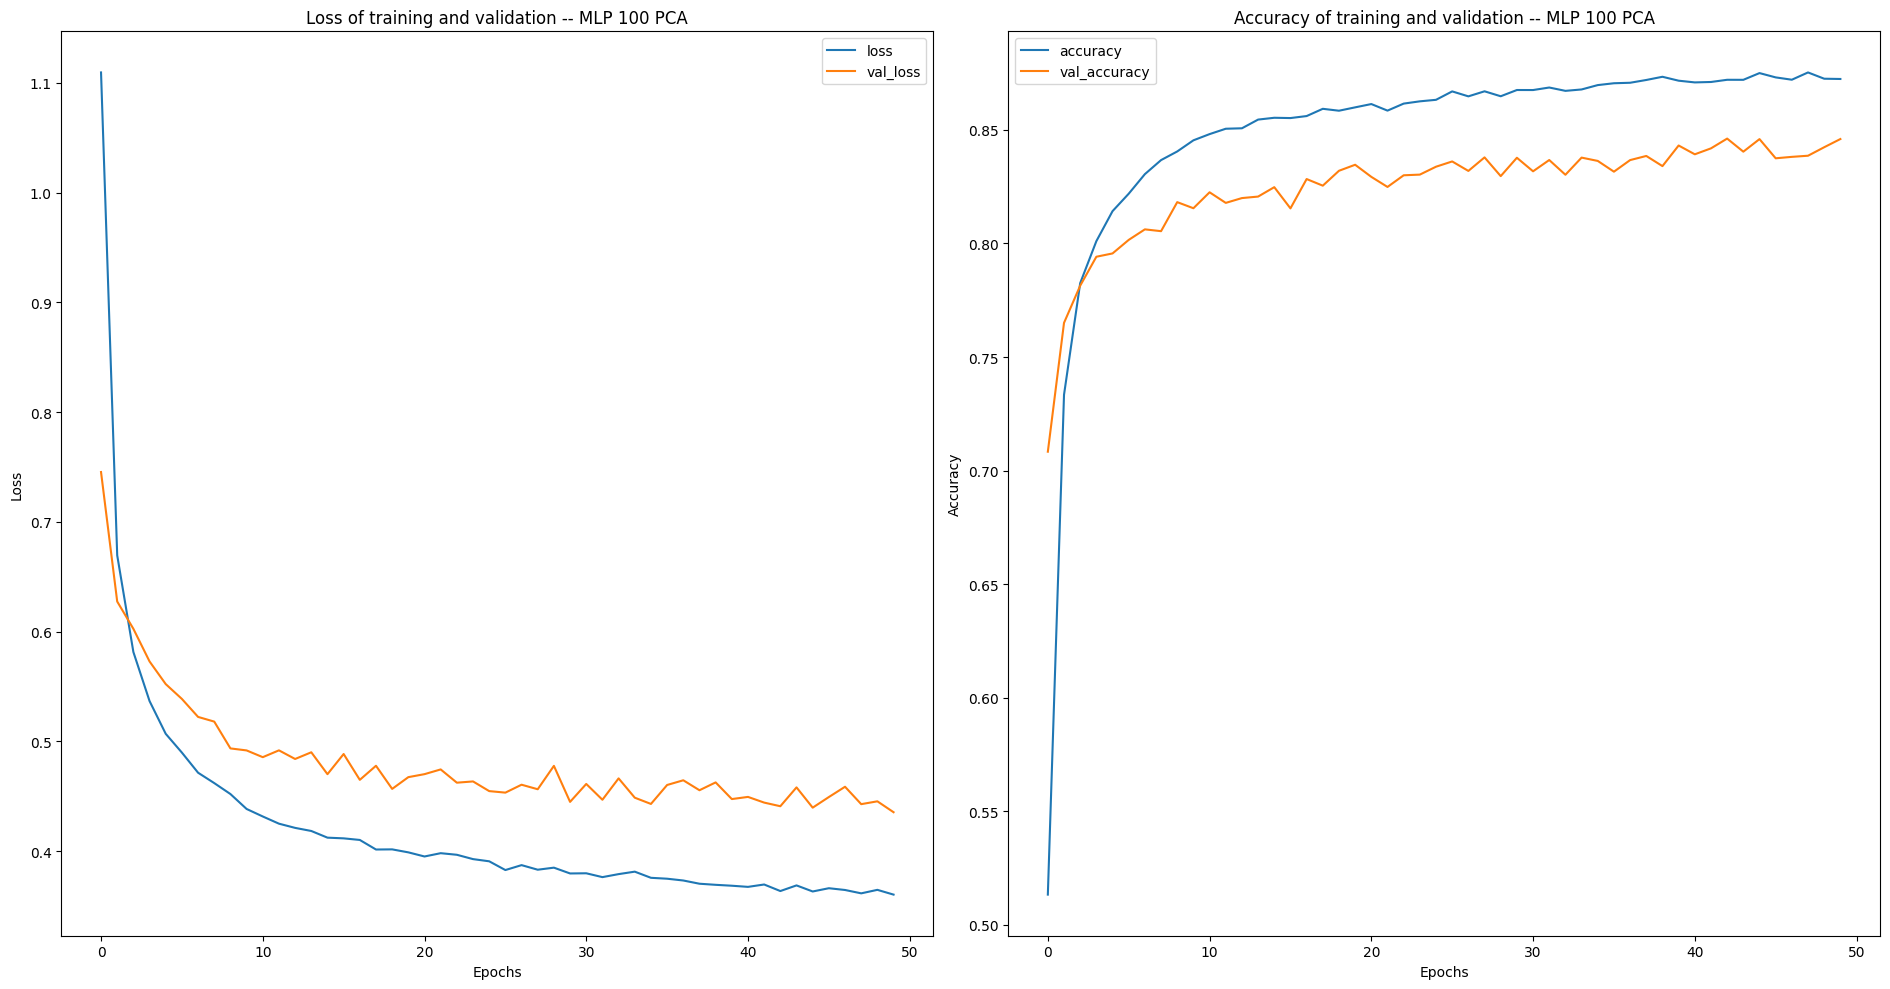

In [20]:
# plot loss of training and validation
plt.figure(figsize=(19, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss of training and validation -- MLP 100 PCA')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy of training and validation -- MLP 100 PCA')

plt.tight_layout()
plt.show()

In [21]:
# save model
mlp.save('mlp_100_pca.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# load model
# mlp = load_model('mlp_100_pca.h5')

944/944 [==============================] - 0s 413us/step
Accuracy: 0.8459526568448932
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      2460
           1       0.94      0.75      0.84      3787
           2       0.99      0.89      0.94      7102
           3       0.74      0.78      0.76      6925
           4       0.79      0.88      0.83      9931

    accuracy                           0.85     30205
   macro avg       0.87      0.84      0.85     30205
weighted avg       0.86      0.85      0.85     30205



Text(0.5, 1.0, 'Confusion Matrix -- MLP 100 PCA')

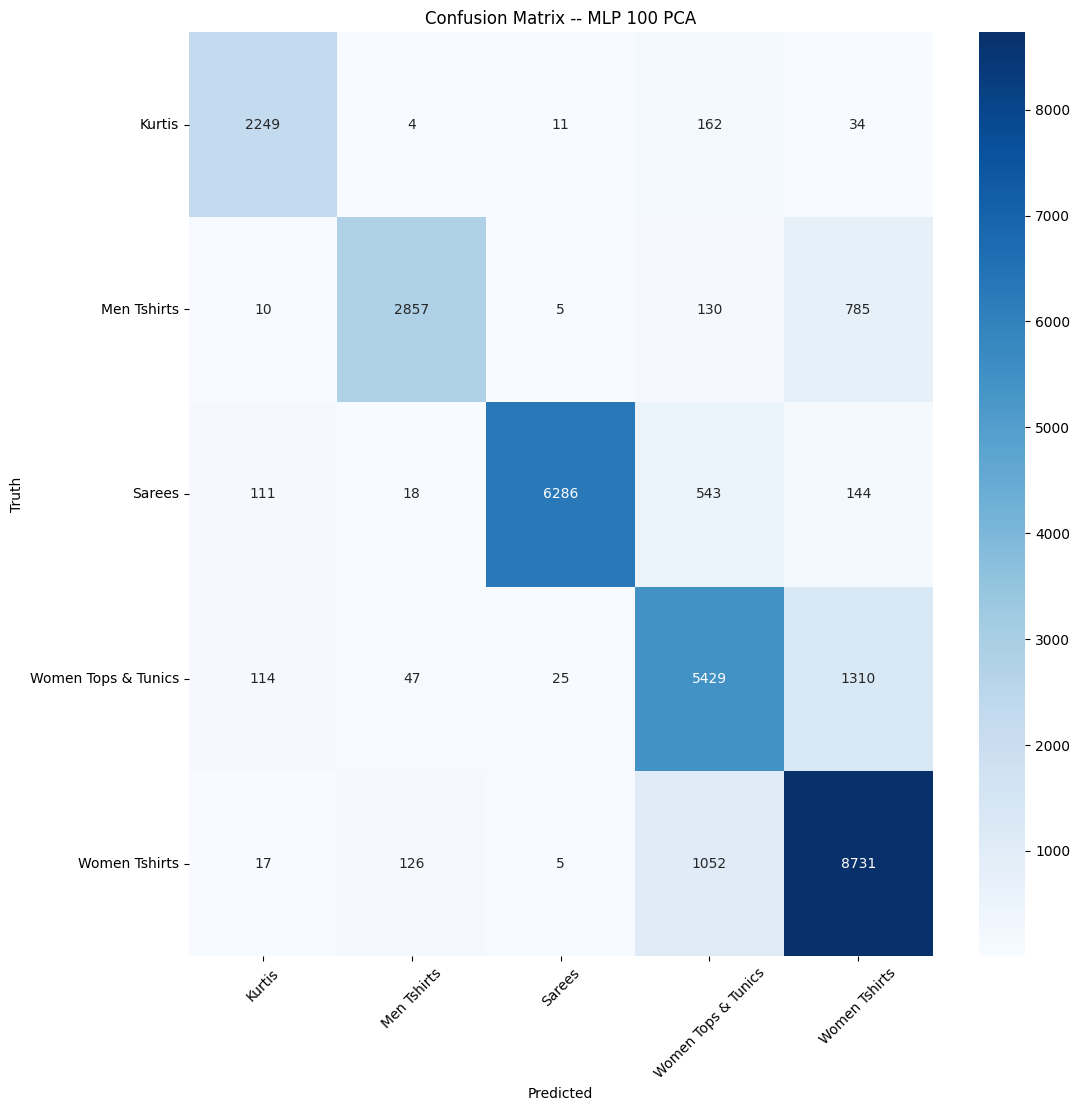

In [23]:
y_pred = mlp.predict(test_x)
y_pred = np.argmax(y_pred, axis=1)

print('Accuracy:', accuracy_score(test_y, y_pred))
print('Classification Report:')
print(classification_report(test_y, y_pred))

cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(ticks=np.arange(5) + 0.5, labels=lbe.classes_, rotation=45)
plt.yticks(ticks=np.arange(5) + 0.5, labels=lbe.classes_, rotation=0)
plt.title('Confusion Matrix -- MLP 100 PCA')


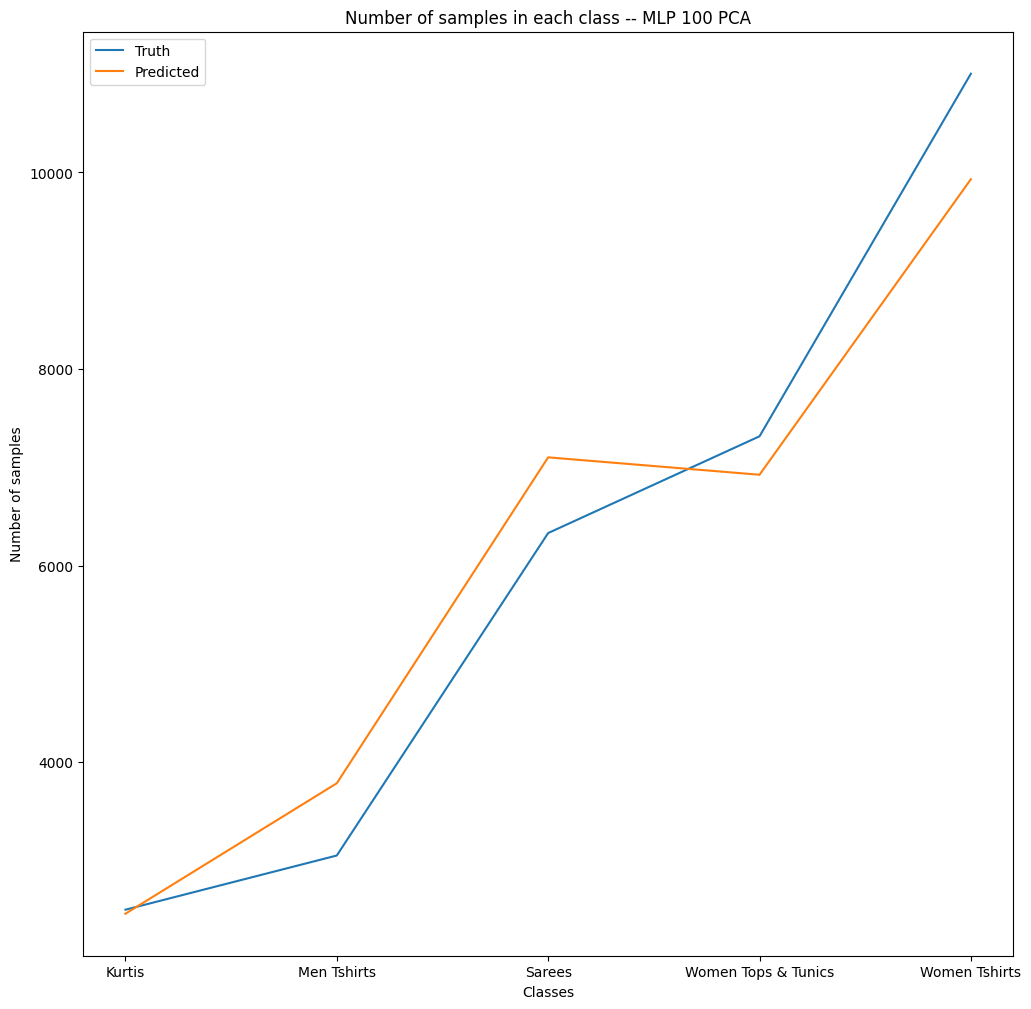

In [24]:
plt.figure(figsize=(12, 12))
plt.plot(sum(cm), label='Truth')
plt.plot(sum(cm.T), label='Predicted')
plt.xticks(ticks=np.arange(5), labels=lbe.classes_)
plt.legend()
plt.title('Number of samples in each class -- MLP 100 PCA')
plt.xlabel('Classes')
plt.ylabel('Number of samples')
plt.show()

944/944 [==============================] - 0s 340us/step


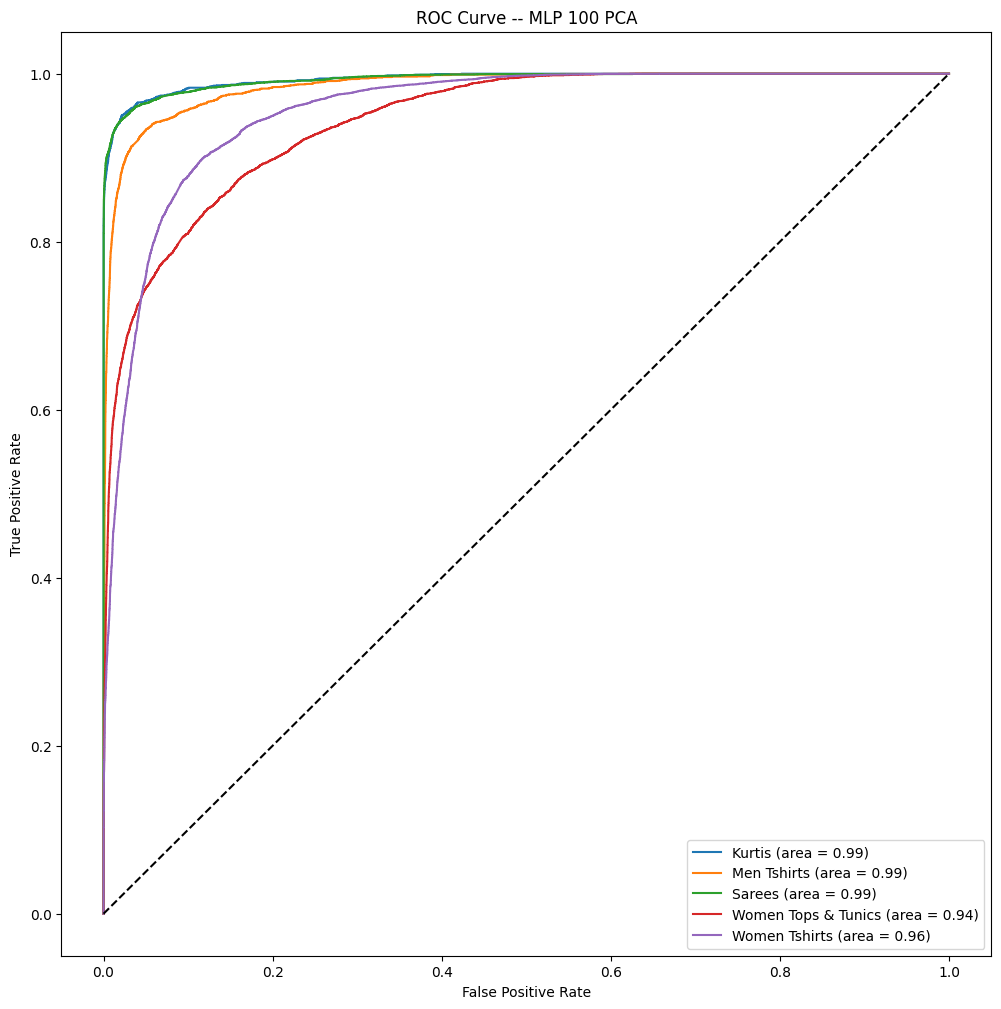

In [25]:
# roc curve
from sklearn.metrics import roc_curve, auc

y_pred = mlp.predict(test_x)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(test_y == i, y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(12, 12))
for i in range(5):
    plt.plot(fpr[i], tpr[i], label='{} (area = {:.2f})'.format(lbe.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve -- MLP 100 PCA')
plt.show()